# Create Dataframe

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(123)

# Create an empty dictionary to store column data
data = {}

# Create 10 columns
for i in range(1, 11):
    # Generate random data for each column
    column_data = np.random.exponential(scale=1, size=100)
    
    # Introduce outliers
    outliers_indices = np.random.choice(100, size=10, replace=False)
    column_data[outliers_indices] = column_data[outliers_indices] + np.random.uniform(10, 20, size=10)
    
    # Add the column data to the dictionary
    data[f'Column {i}'] = column_data

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10
0,1.192272,0.085088,0.407722,0.193376,17.522970,0.016206,17.471158,0.782691,0.530443,1.758578
1,0.337067,14.188394,0.783047,0.714118,0.385251,0.286164,0.207878,0.165412,0.006159,0.141435
2,0.257284,0.567582,1.184120,1.414471,2.115901,0.402432,0.851718,0.655805,0.060864,0.906793
3,0.801434,0.681871,2.431921,0.116652,0.186886,0.206425,0.351635,0.324320,0.349981,1.815172
4,1.271071,0.684664,0.869200,1.698811,0.819742,1.388161,0.609509,1.813590,1.854278,1.445898
...,...,...,...,...,...,...,...,...,...,...
95,1.176688,0.184063,16.247557,1.615842,3.590166,0.648715,0.149672,0.138362,0.720663,2.126534
96,0.163846,0.643585,1.958406,2.083127,17.384339,0.508455,1.263953,2.017031,0.373959,0.682014
97,0.508955,0.796156,1.055995,0.605118,2.537791,0.076641,0.477138,1.117264,0.907175,1.113074
98,0.275564,0.572891,0.265242,0.454950,0.476024,0.325488,2.026641,2.848281,0.366444,0.494391


In [2]:
skewness = df.skew()

# Print the skewness values
skewness

Column 1     2.695116
Column 2     2.696047
Column 3     2.686861
Column 4     2.702588
Column 5     2.696907
Column 6     2.618043
Column 7     2.682142
Column 8     2.711842
Column 9     2.641697
Column 10    2.685461
dtype: float64

# Check dist

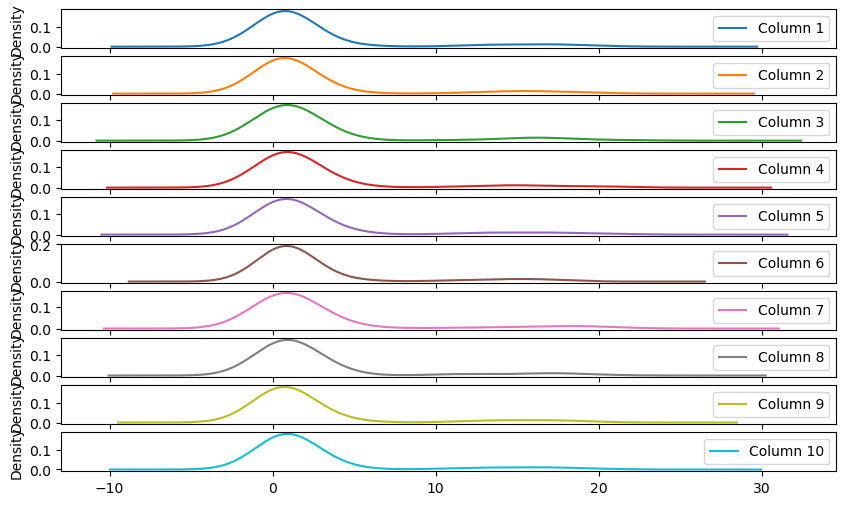

In [3]:
import matplotlib.pyplot as plt


# Plot the KDE for each column
df.plot.kde(subplots=True, figsize=(10, 6))
plt.show()

# Check outliers

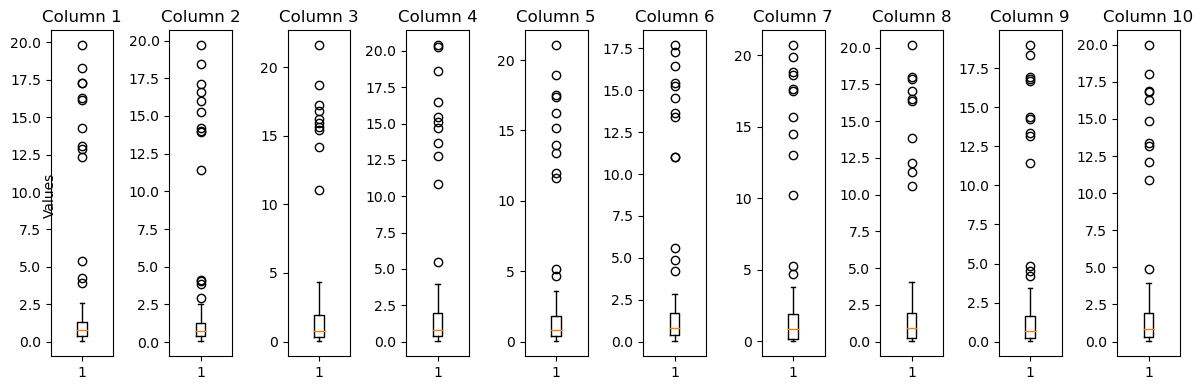

In [4]:
# Create a figure and axes for the box plots
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12, 4))

# Iterate over each column and create a box plot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Set the y-axis label for all subplots
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


# Remove

In [5]:
# Iterate over each column and remove outliers using IQR method
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [6]:
df

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10
2,0.257284,0.567582,1.184120,1.414471,2.115901,0.402432,0.851718,0.655805,0.060864,0.906793
3,0.801434,0.681871,2.431921,0.116652,0.186886,0.206425,0.351635,0.324320,0.349981,1.815172
4,1.271071,0.684664,0.869200,1.698811,0.819742,1.388161,0.609509,1.813590,1.854278,1.445898
8,0.655720,1.065736,0.223645,0.285849,0.043188,0.496165,0.074250,1.970002,0.659102,0.228076
9,0.497774,0.621171,1.717994,1.042513,0.014277,0.198197,0.806795,1.957902,2.655771,0.814228
10,0.420342,0.832435,0.625367,0.038109,0.588040,0.453375,1.410610,2.719445,0.081341,1.490673
11,1.305820,0.551501,1.513068,1.427307,0.417634,0.230111,1.571983,0.075312,0.296196,0.545057
16,0.201494,0.897448,1.482267,0.155019,0.411263,1.729065,1.973335,0.359829,1.215686,0.379943
18,0.758329,1.119815,0.228538,0.677227,0.158512,1.026106,0.816848,0.198515,0.858474,2.006912
23,0.944236,0.059883,0.091466,0.567342,0.945379,1.010453,0.039905,1.203337,0.113361,0.126819


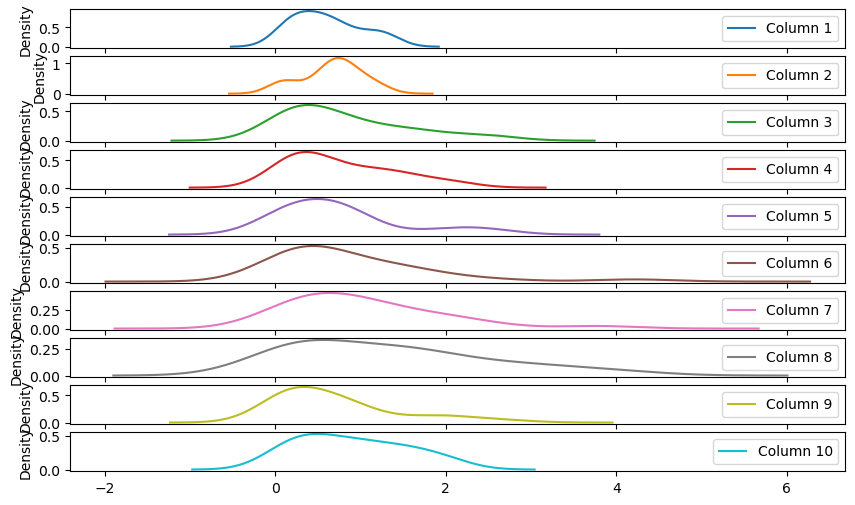

In [7]:
# Plot the KDE for each column
df.plot.kde(subplots=True, figsize=(10, 6))
plt.show()

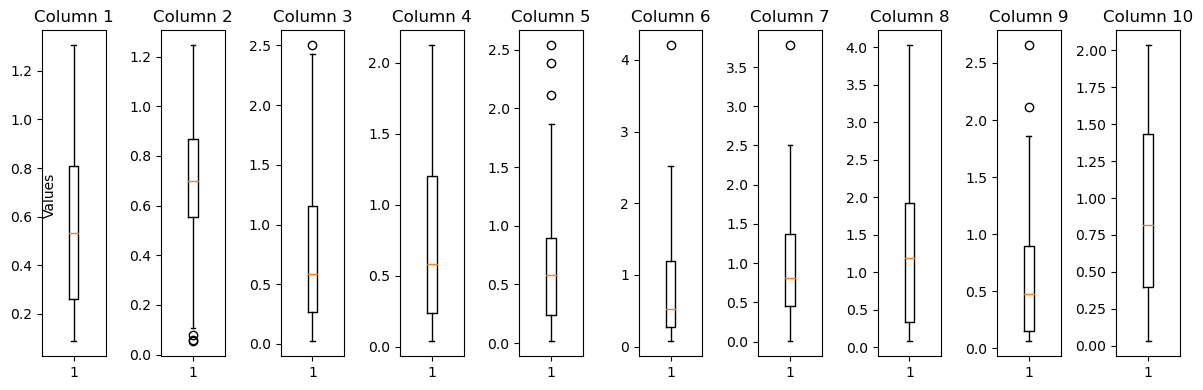

In [8]:
# Create a figure and axes for the box plots
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12, 4))

# Iterate over each column and create a box plot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Set the y-axis label for all subplots
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


# for capping 

In [9]:
# Calculate the lower and upper bounds for capping outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df_capped = df.clip(lower_bound, upper_bound, axis=1)

# Print the capped DataFrame
df_capped

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10
2,0.257284,0.567582,1.184120,1.414471,1.894102,0.402432,0.851718,0.655805,0.060864,0.906793
3,0.801434,0.681871,2.431921,0.116652,0.186886,0.206425,0.351635,0.324320,0.349981,1.815172
4,1.271071,0.684664,0.869200,1.698811,0.819742,1.388161,0.609509,1.813590,1.854278,1.445898
8,0.655720,1.065736,0.223645,0.285849,0.043188,0.496165,0.074250,1.970002,0.659102,0.228076
9,0.497774,0.621171,1.717994,1.042513,0.014277,0.198197,0.806795,1.957902,2.011601,0.814228
10,0.420342,0.832435,0.625367,0.038109,0.588040,0.453375,1.410610,2.719445,0.081341,1.490673
11,1.305820,0.551501,1.513068,1.427307,0.417634,0.230111,1.571983,0.075312,0.296196,0.545057
16,0.201494,0.897448,1.482267,0.155019,0.411263,1.729065,1.973335,0.359829,1.215686,0.379943
18,0.758329,1.119815,0.228538,0.677227,0.158512,1.026106,0.816848,0.198515,0.858474,2.006912
23,0.944236,0.085991,0.091466,0.567342,0.945379,1.010453,0.039905,1.203337,0.113361,0.126819


In [10]:
df.describe()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.600562,0.663449,0.811277,0.768266,0.754799,0.891968,1.039565,1.336553,0.701522,0.897922
std,0.389360,0.340809,0.715325,0.607115,0.718415,0.924027,0.884260,1.138367,0.706281,0.623304
min,0.086860,0.052615,0.020791,0.038109,0.014277,0.072681,0.001363,0.075312,0.060864,0.027813
25%,0.261854,0.555521,0.269234,0.235088,0.236229,0.269174,0.447735,0.333197,0.153725,0.396603
50%,0.531892,0.700353,0.588089,0.586230,0.577084,0.531216,0.811822,1.192487,0.473809,0.819115
75%,0.810634,0.868541,1.152089,1.204055,0.899378,1.197748,1.374560,1.921824,0.896876,1.430618
max,1.305820,1.246506,2.502220,2.125336,2.537791,4.205331,3.779471,4.029495,2.655771,2.036200


# for both zscore and iqr

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Set random seed for reproducibility
np.random.seed(123)

# Generate data for normal distribution columns
normal_data = np.random.normal(loc=0, scale=1, size=(100, 6))

# Generate data for non-normal distribution columns
non_normal_data = np.random.exponential(scale=1, size=(100, 6))

# Combine normal and non-normal data
data = np.concatenate((normal_data, non_normal_data), axis=1)

# Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'])

# Check normality and apply z-score or IQR method accordingly
z_score_threshold = 3  # Threshold for z-score outliers
iqr_multiplier = 1.5  # Multiplier for IQR outliers

for col in df.columns:
    # Check normality using Shapiro-Wilk test
    _, p_value = shapiro(df[col].dropna())
    
    if p_value > 0.05:
        # Apply z-score method for columns following a normal distribution
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        df[col] = np.where(abs(z_scores) > z_score_threshold, np.nan, df[col])
    else:
        # Apply IQR method for columns not following a normal distribution
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# Fill outliers with nearest non-outlier values
df_capped = df.fillna(method='bfill').fillna(method='ffill')

# Create a new DataFrame with capped outliers
new_df = pd.DataFrame(df_capped, columns=df.columns)

# Print the new DataFrame\\
new_df


,A,B,C,D,E,F,G,H,I,J,K,L
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600,1.651437,0.391890,1.404017,0.120484,1.493277,0.881653,1.804168
1,-2.426679,-0.428913,1.265936,-0.866740,-0.678886,-0.094709,0.563656,0.980734,0.808361,1.049946,1.408435,0.787048
2,1.491390,-0.638902,-0.443982,-0.434351,2.205930,2.186786,0.191199,2.344598,0.230468,1.049946,0.308016,0.253061
3,1.004054,0.386186,0.737369,1.490732,-0.935834,1.175829,0.256085,1.909320,1.758257,0.433407,0.308016,0.136265
4,-1.253881,-0.637752,0.907105,-1.428681,-0.140069,-0.861755,0.401347,1.803891,2.296520,0.720887,0.121473,0.054013
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.094153,-0.233504,1.330631,0.216397,1.255464,0.974386,1.168422,0.060687,0.122489,0.459450,2.235368,0.286081
96,-0.324487,-0.167000,1.929832,0.191482,-0.758628,-1.200043,0.021839,1.656941,1.892122,0.769371,2.235368,0.197274
97,0.974132,0.160294,-0.792092,0.674585,0.159749,-1.660475,0.321127,0.020662,0.875706,2.183814,0.932423,0.083692
98,0.588686,1.333191,2.559850,0.034903,0.232650,1.606597,1.181636,1.126828,0.182415,1.766000,2.434864,0.497086


In [12]:
new_df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
dtype: int64

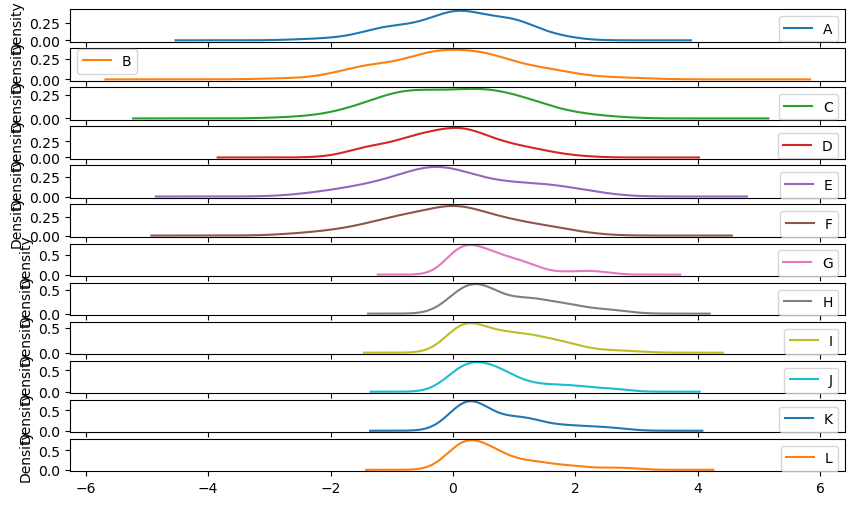

In [13]:
# Plot the KDE for each column
new_df.plot.kde(subplots=True, figsize=(10, 6))
plt.show()

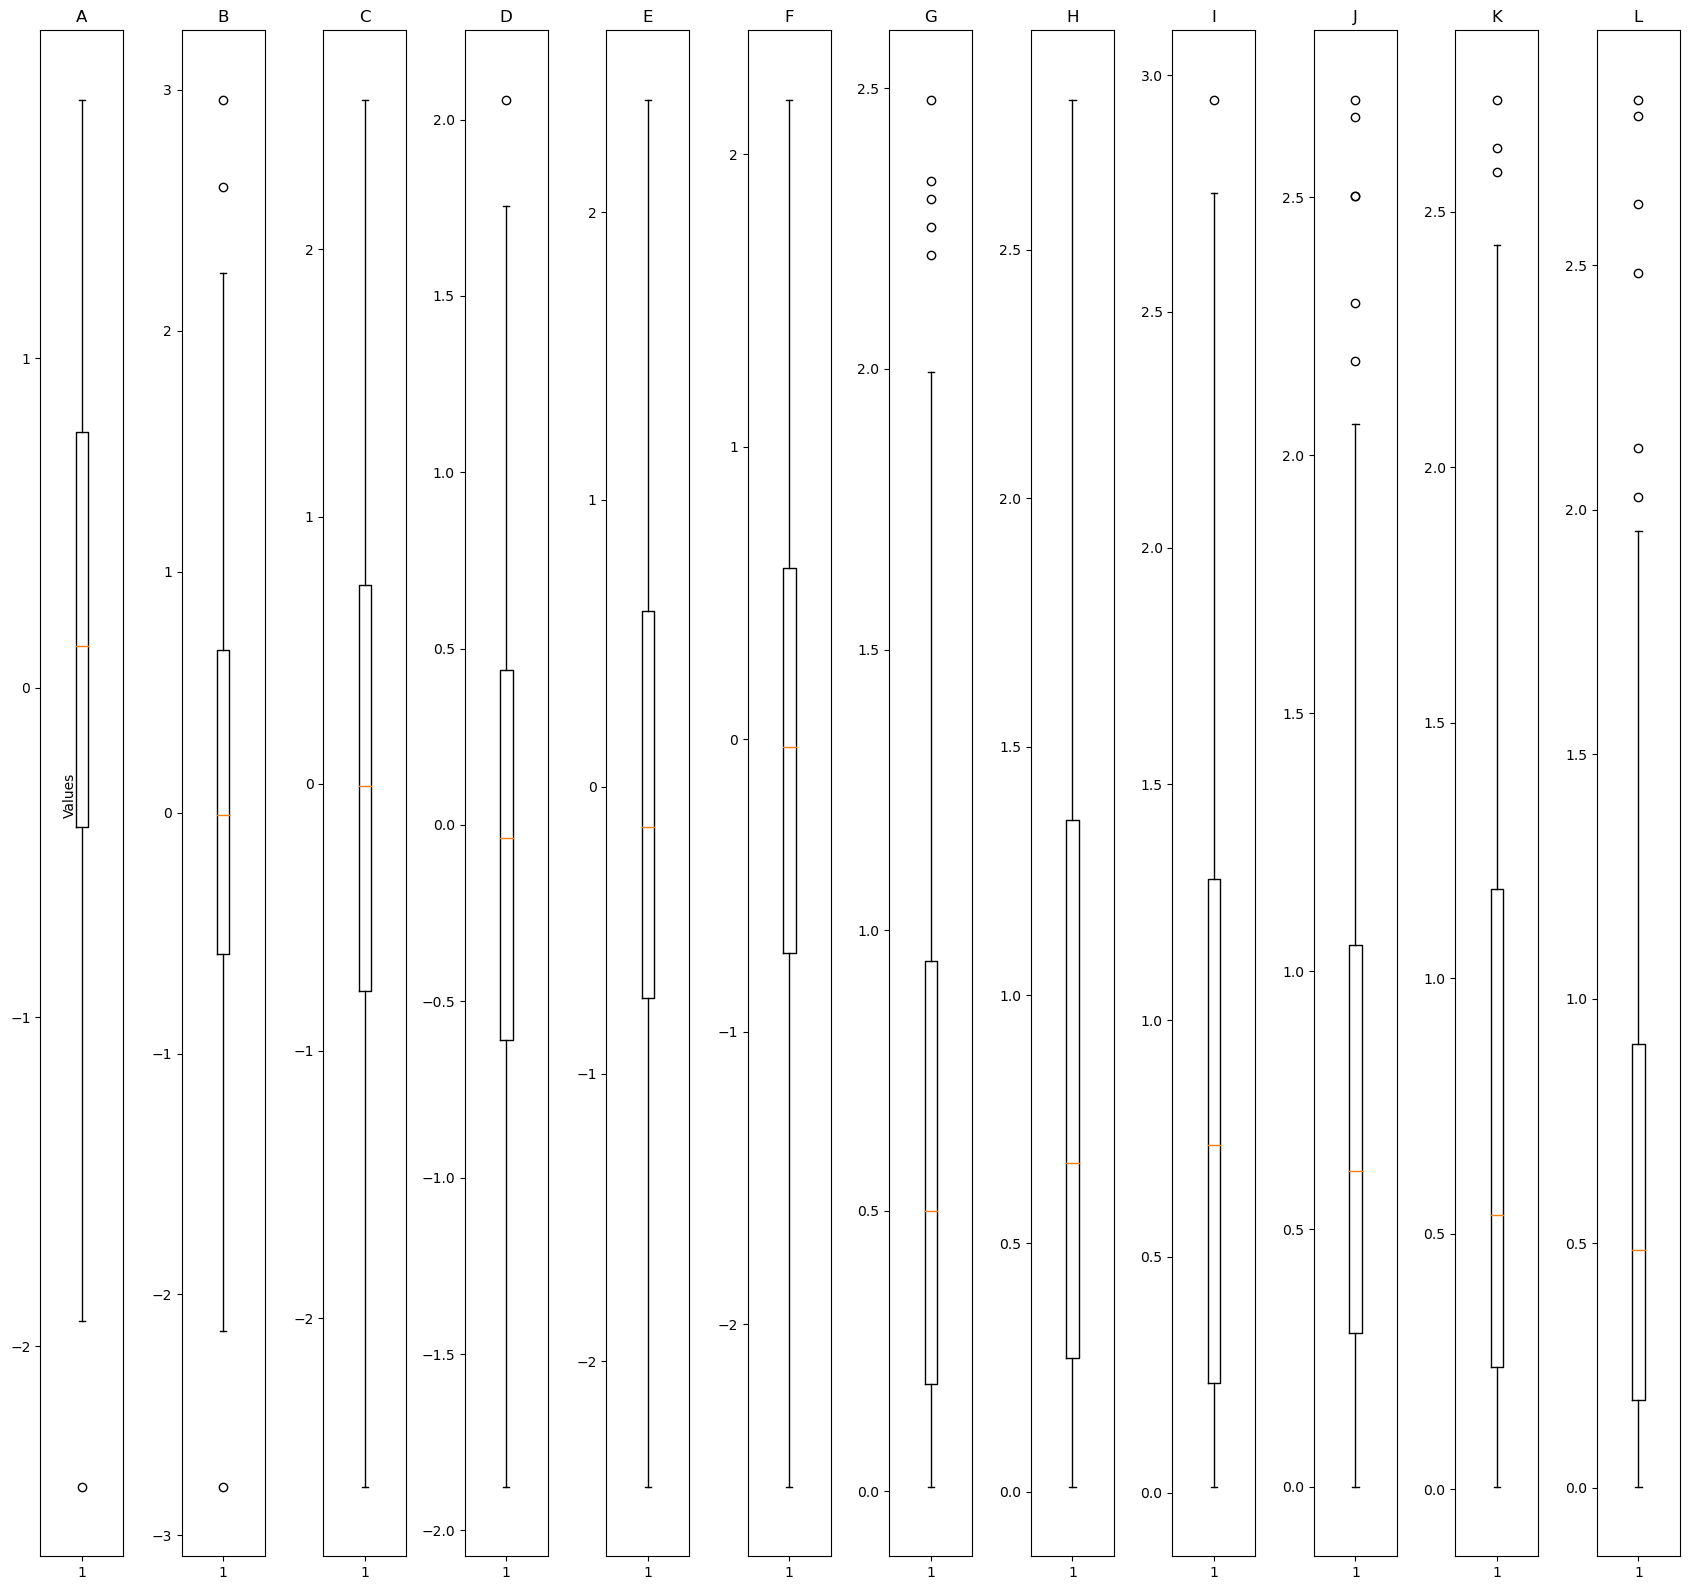

In [14]:
# Create a figure and axes for the box plots
fig, axes = plt.subplots(nrows=1, ncols=len(new_df.columns), figsize=(17, 16))

# Iterate over each column and create a box plot
for i, column in enumerate(new_df.columns):
    axes[i].boxplot(new_df[column])
    axes[i].set_title(column)

# Set the y-axis label for all subplots
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
